# Part 1: Matplotlib
## 1. Plotting the historical and projected population of the USA, Russia, Sweden, Japan, and Canada

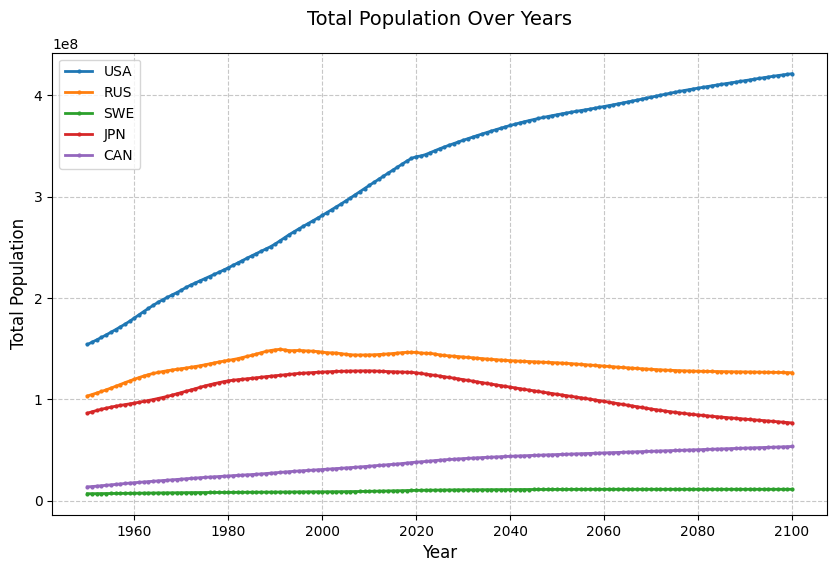

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import data
df_usa = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv')
df_rus = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-rus--age--gender--year.csv')
df_swe = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-swe--age--gender--year.csv')
df_jpn = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv')
df_can = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-can--age--gender--year.csv')

# yearly sum for countries
yearly_total_usa = pd.DataFrame(df_usa.groupby('year')['population'].sum())
yearly_total_rus = pd.DataFrame(df_rus.groupby('year')['population'].sum())
yearly_total_swe = pd.DataFrame(df_swe.groupby('year')['population'].sum())
yearly_total_jpn = pd.DataFrame(df_jpn.groupby('year')['population'].sum())
yearly_total_can = pd.DataFrame(df_can.groupby('year')['population'].sum())

plt.figure(figsize=(10, 6))
plt.plot(yearly_total_usa.index, yearly_total_usa['population'], 
         marker='o', linestyle='-',
         linewidth=2, markersize=2, label='USA')
plt.plot(yearly_total_rus.index, yearly_total_rus['population'], 
         marker='o', linestyle='-',
         linewidth=2, markersize=2, label='RUS')
plt.plot(yearly_total_swe.index, yearly_total_swe['population'], 
         marker='o', linestyle='-',
         linewidth=2, markersize=2, label='SWE')
plt.plot(yearly_total_jpn.index, yearly_total_jpn['population'], 
         marker='o', linestyle='-',
         linewidth=2, markersize=2, label='JPN')
plt.plot(yearly_total_can.index, yearly_total_can['population'], 
         marker='o', linestyle='-', 
         linewidth=2, markersize=2, label='CAN')
plt.cm.Set2
plt.title('Total Population Over Years', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Population', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

## 2. Relative population frequencies by age in 1950, 1985, and 2020

<function matplotlib.pyplot.show(close=None, block=None)>

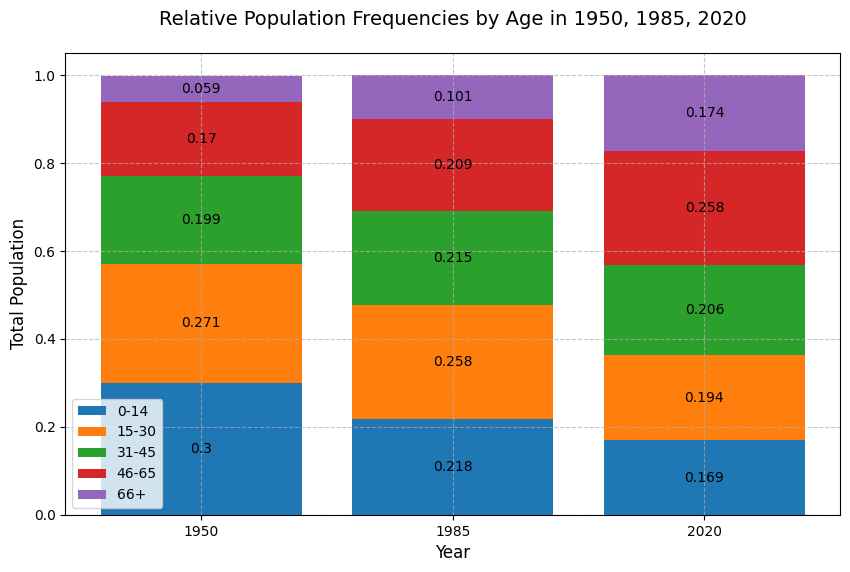

In [3]:
# import data
df_usa = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv')
df_rus = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-rus--age--gender--year.csv')
df_swe = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-swe--age--gender--year.csv')
df_jpn = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv')
df_can = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-can--age--gender--year.csv')
# combine country dfs
df_all = pd.concat([df_usa, df_rus, df_swe, df_jpn, df_can], ignore_index=True)

# select rows by age and sum based on year, select only years 1950, 1985, 2020
age_ranges = [range(0,15), range(15,31), range(31,46), range(46,66), range(66,150)]
df_0_14 = df_all[df_all['age'].isin(age_ranges[0])]
df_0_14 = pd.DataFrame(df_0_14.groupby('year')['population'].sum(), index=[1950,1985,2020])
df_15_30 = df_all[df_all['age'].isin(age_ranges[1])]
df_15_30 = pd.DataFrame(df_15_30.groupby('year')['population'].sum(), index=[1950,1985,2020])
df_31_45 = df_all[df_all['age'].isin(age_ranges[2])]
df_31_45 = pd.DataFrame(df_31_45.groupby('year')['population'].sum(), index=[1950,1985,2020])
df_46_65 = df_all[df_all['age'].isin(age_ranges[3])]
df_46_65 = pd.DataFrame(df_46_65.groupby('year')['population'].sum(), index=[1950,1985,2020])
df_66_ = df_all[df_all['age'].isin(age_ranges[4])]
df_66_ = pd.DataFrame(df_66_.groupby('year')['population'].sum(), index=[1950,1985,2020])
df_totals = pd.DataFrame(df_all.groupby('year')['population'].sum(), index=[1950,1985,2020])

# convert the population values to lists
x = ['1950', '1985', '2020']
y1 = df_0_14['population'].tolist()
y2 = df_15_30['population'].tolist()
y3 = df_31_45['population'].tolist()
y4 = df_46_65['population'].tolist()
y5 = df_66_['population'].tolist()
totals = df_totals['population'].tolist()

# convert populations to proportion of total for the year
y_list = [y1,y2,y3,y4,y5]
# for each of the five lists...
for i in range(len(y_list)):
    # ...for each of the three values...
    current = y_list[i]
    for j in range(len(current)):
        # ...divide by the total population of that year
        current[j] = current[j]/totals[j]
    y_list[i] = current

# make rounded lists for display on bar chart
y_rounded = []
for i in range(len(y_list)):
    current = y_list[i]
    for j in range(len(current)):
        current[j] = round(current[j],3)
    y_rounded.append(current)

plt.figure(figsize=(10, 6))
# set up list to iterate for position of bottom of bars
y_bottom = [0,0,0]
for i in range(len(y_list)):
    current_y = y_list[i]
    plt.bar_label(plt.bar(x = x, height = current_y, bottom = y_bottom), label_type = 'center', labels = y_rounded[i])
    # add heights of current_y to y_bottom for next y_list
    for j in range(len(current_y)):
        y_bottom[j] += current_y[j]
plt.cm.Set2
plt.legend(['0-14','15-30','31-45','46-65','66+'])
plt.title('Relative Population Frequencies by Age in 1950, 1985, 2020', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Population', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout
plt.show

# Part 2: Seaborn
## 1. Heatmap of age frequencies for USA, Russia, Sweden, Japan, Canada
### Year of focus: 1990

<Axes: xlabel='country', ylabel='age range'>

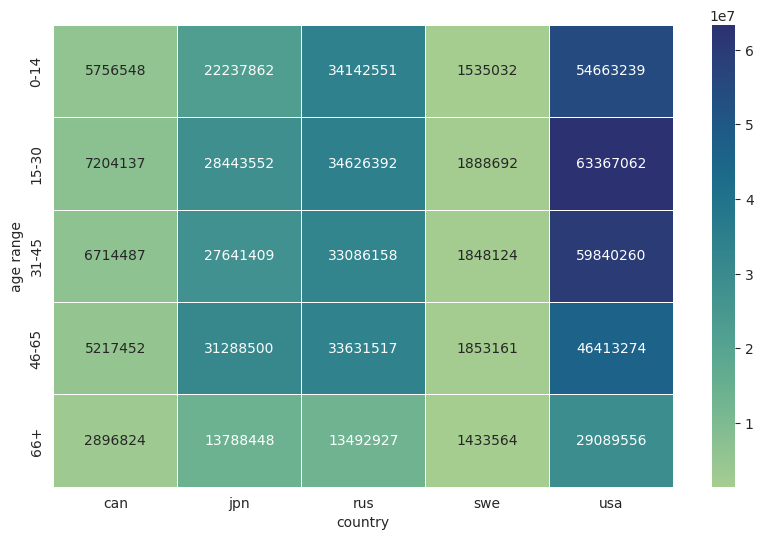

In [4]:
import seaborn as sns

df_usa = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv')
df_rus = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-rus--age--gender--year.csv')
df_swe = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-swe--age--gender--year.csv')
df_jpn = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv')
df_can = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-can--age--gender--year.csv')
# function to label age column with range
def label_age(age):
    if age <= 14: return '0-14'
    if 15 <= age <= 30: return '15-30'
    if 31 <= age <= 45: return '31-45'
    if 46 <= age <= 65: return '46-65'
    if age >= 66: return '66+'

# using dataframes for each country's age, population data from first matplotlib section
df_set = [df_usa, df_rus, df_swe, df_jpn, df_can]
countries = ['usa', 'rus', 'swe', 'jpn', 'can']
for i in range(len(df_set)):
    current = df_set[i]
    current = pd.DataFrame(current[current['year']==1990]) # select 1990 data
    current['age range'] = current['age'].apply(label_age) # add age range labels
    current = pd.DataFrame(current.groupby('age range')['population'].sum()) # sum population by age range
    current['country'] = countries[i] # reinsert country column label for concat
    df_set[i] = current.reset_index()

# format data for heatmap
df = pd.concat(df_set).pivot(columns = 'country', index = 'age range', values = 'population')

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.color_palette('husl',8)
sns.heatmap(df, linewidth=0.5, cmap='crest', fmt='.0f', annot=True)

- Generally, there are less people over 65 than in any other age group, and more people between 15 and 30 compared to any other age group.
- The USA has the overall highest population of any other country while Sweden had the overall lowest.

## 2. Violin plot comparing age distributions in 2020 between the USA and Russia, separated by gender

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

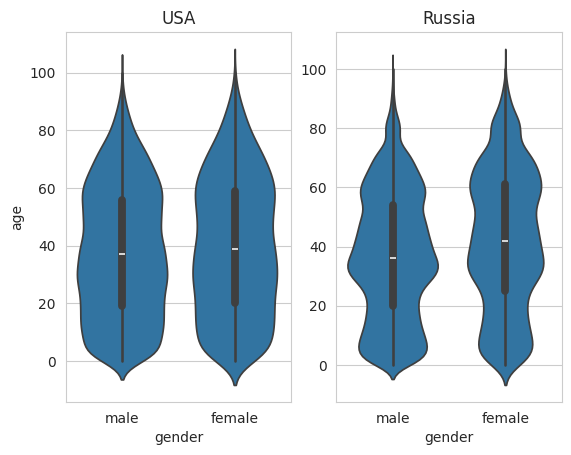

In [71]:
df_usa = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv')
df_rus = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-rus--age--gender--year.csv')
# assuming gender 1 = male, 2 = female
usa_m = df_usa[df_usa['gender']==1]
usa_f = df_usa[df_usa['gender']==2]
rus_m = df_rus[df_rus['gender']==1]
rus_f = df_rus[df_rus['gender']==2]

df_set = [usa_m, usa_f, rus_m, rus_f]
gender_set = ['male', 'female', 'male', 'female']
country_set = ['usa', 'usa', 'rus', 'rus']
for i in range(len(df_set)):
    current = df_set[i]
    current = pd.DataFrame(current[current['year']==2020]) # select 2020 data
    current = pd.DataFrame(current.groupby('age')['population'].sum()).reset_index() # sum population by age
    normfactor = current['population'].min()
    # normalize values so that minimum value is 1
    def normpop(x):
        return round(x/normfactor)
    current['normpop'] = current['population'].apply(normpop)
    # make data frame where there are n data points for an age with a population of n
    rep = pd.DataFrame(current['age'].repeat(current['normpop']))
    rep['country'] = country_set[i] # add country label
    rep['gender'] = gender_set[i] # add gender label
    df_set[i] = rep
df = pd.concat(df_set)

plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(1,2)
sns.set_style('whitegrid')
sns.color_palette('husl',8)
sns.violinplot(data=df[df['country']=='usa'], y='age', x='gender', ax=ax[0], orient='v', density_norm='area')
sns.violinplot(data=df[df['country']=='rus'], y='age', x='gender', ax=ax[1], orient='v', density_norm='area')
ax[0].set_title('USA')
ax[1].set_title('Russia')
ax[1].set_ylabel('')
plt.show

- Notes:
    - Data was normalized by dividing all values in each subset of data by the minimum value, therefore maintaining relative frequencies and reducing the minimum value to 1. A data frame was then generated to have repeating data points of age, gender, and country based on the normalized frequency counts.
    - The violin plots are plotted such that the areas of each plot is the same regardless of actual population counts.
- All four plots taper off more at the higher age ranges, likely due to deaths occurring at varying ages.
- The USA had a relatively even spread of ages throughout its population in both genders.
- Russia has more pronounced concave and convex curves, indicating that age groupings were generally tighter in the Russian population than in the USA population.
- The female plot for Russia indicates that there were significantly more older female individuals. Additionally, the median age of females was higher.
- The male plot for Russia indicates there were more males in their 30s than at any other age.

## 3. Pairplot comparing population metrics for the USA, Russia, Japan, and Sweden

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

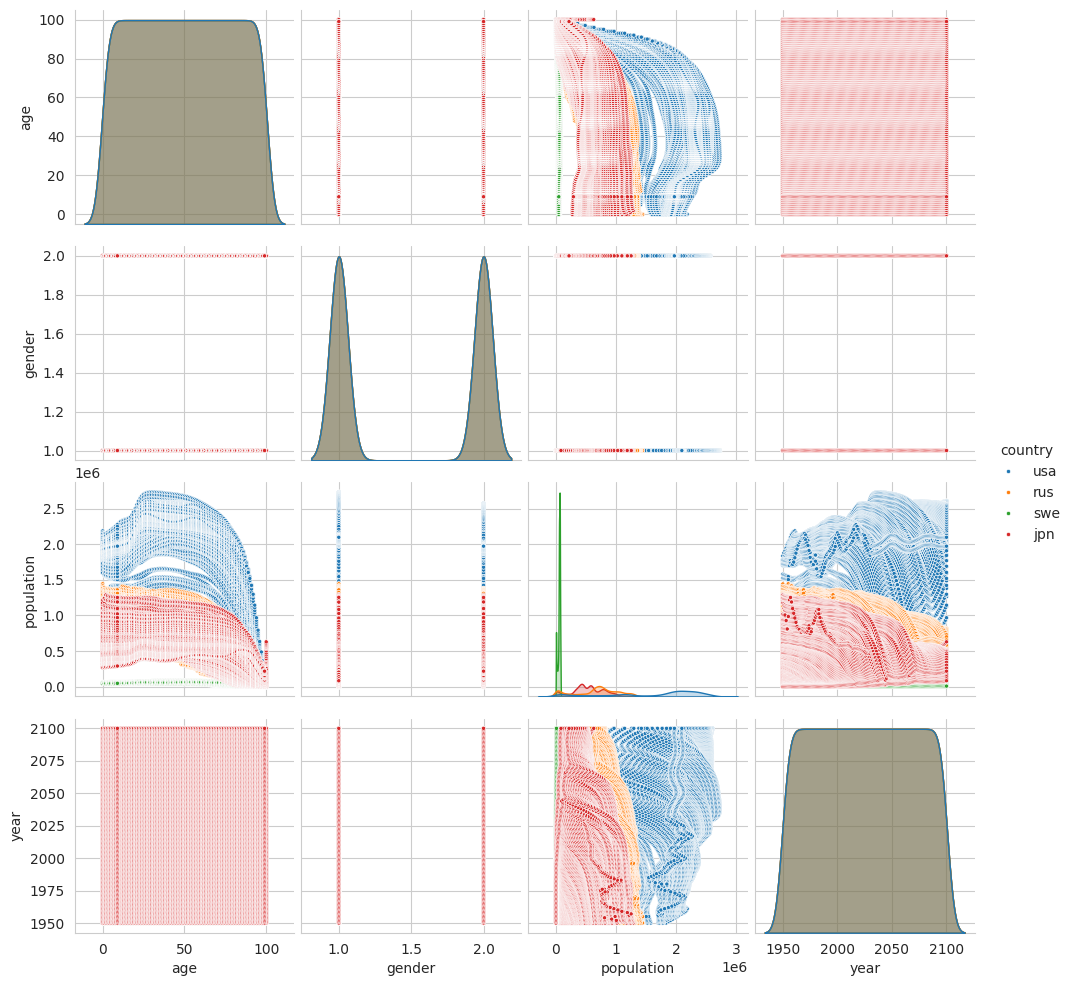

In [81]:
df_usa = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv')
df_rus = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-rus--age--gender--year.csv')
df_swe = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-swe--age--gender--year.csv')
df_jpn = pd.read_csv('ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv')

df = pd.concat([df_usa, df_rus, df_swe, df_jpn])

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.color_palette('husl',8)
sns.pairplot(data=df, vars=['age','gender','population', 'year'], hue='country', markers='.')
plt.show

Some Observations:
- Generally, from most to least populated, the countries consistently remain in the order of the USA, Russia, Japan, Sweden
- The USA's population has been growing over time, but the growth is projected to slow sometime around 2050
- The populations of Russia and Japan have been decreasing over time and is projected to continue to decrease